In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cobaya.yaml import yaml_load_file
#
from getdist.mcsamples import MCSamplesFromCobaya
from getdist.mcsamples import loadMCSamples,MCSamples
import getdist.plots as gdplt
#
import os

In [2]:
# Planck:
planck18 = loadMCSamples("/global/cscratch1/sd/mwhite/unWISE/chains/planck18",\
                         settings={'ignore_rows':0.3})
p = planck18.getParams()
# Add S8 and "rename" H0 and Omega_m.
planck18.addDerived(p.sigma8*(p.Omega_m/0.3)**0.50,name='S8',label='S_8')
planck18.addDerived(p.sigma8*(p.Omega_m/0.3)**0.25,name='Sig8',label='\Sigma_8')
planck18.addDerived(p.H0/100.,name='hub',label='h')
planck18.addDerived(p.Omega_m,name='Omegam',label=r'\Omega_m')
#
# Just look at some statistics:
print("\nPlanck18:")
for k in ['Omegam','hub','sigma8','S8','Sig8']:
    print( planck18.getInlineLatex(k) )


Planck18:
\Omega_m = 0.3153^{+0.0065}_{-0.0077}
h = 0.6736\pm 0.0053
\sigma_8 = 0.8111\pm 0.0056
S_8 = 0.832\pm 0.012
\Sigma_8 = 0.8213\pm 0.0081


In [11]:
# Planck Lensing Only:
# The Planck18 lensing-only chains.
#lbase = "/global/cscratch1/sd/mwhite/unWISE/chains/lensing_lenspriors/"
lbase = "/global/cscratch1/sd/mwhite/Planck/base/lensing_lenspriors_BAO_theta/"
plens = loadMCSamples(lbase+"base_lensing_lenspriors_BAO_theta_post_Apr6",\
                      settings={'ignore_rows':0.3})
p = plens.getParams()
# Add S8 and "rename" H0 and Omega_m.
#plens.addDerived(p.sigma8*(p.omegam/0.3)**0.50,name='S8',label='S_8')
plens.addDerived(p.sigma8*(p.omegam/0.3)**0.25,name='Sig8',label='\Sigma_8')
plens.addDerived(p.H0/100.,name='hub',label='h')
plens.addDerived(p.omegam,name='Omegam',label=r'\Omega_m')
#
# Just look at some statistics:
print("\nPlanck lensing-only:")
for k in ['Omegam','hub','sigma8','S8','Sig8']:
    print( plens.getInlineLatex(k) )


Planck lensing-only:
\Omega_m = 0.3043\pm 0.0087
h = 0.6800\pm 0.0066
\sigma_8 = 0.812\pm 0.015
S_8 = 0.817\pm 0.018
\Sigma_8 = 0.814\pm 0.016


In [4]:
#lbase = "/global/cscratch1/sd/mwhite/Planck/base/lensing_lenspriors_BAO_theta/"
#plens = loadMCSamples(lbase+"base_lensing_lenspriors_BAO_theta_post_Apr6",\
#                      settings={'ignore_rows':0.3})
#print("Root=",plens.rootname)

Root= base_lensing_lenspriors_BAO_theta_post_Apr6


In [5]:
# KiDS
dbase = "/global/cscratch1/sd/akrolew/chains_unWISE_final"+\
        "/KiDS/KiDS1000_3x2pt_fiducial_chains/cosmology/"
kids  = np.loadtxt(dbase+"samples_multinest_blindC_EE_nE_w.txt",\
                   usecols=[2,20,21,24,-1])
omh3  = kids[:,3]*kids[:,0]**3
chi2 = ((omh3-0.09633)/(5*0.00029))**2    # Chi^2 for Om.h^3 constraint, Eq. (12) PP18.
wt    = kids[:, -1] * np.exp(-0.5*chi2)
kids  = kids[:,:-1]
kids  = MCSamples(samples=kids,\
                  names=['hub','S8','sigma8','Omegam'],\
                  labels=['h','S_8','\sigma_8','\Omega_m'],\
                  weights=wt,label='KiDS')
p = kids.getParams()
kids.addDerived(p.sigma8*(p.Omegam/0.3)**0.25,name='Sig8',label='\Sigma_8')
#
# Just look at some statistics:
print("\nKiDS1000:")
for k in ['Omegam','hub','sigma8','S8','Sig8']:
    print( kids.getInlineLatex(k) )


KiDS1000:
\Omega_m = 0.303\pm 0.011
h = 0.6824\pm 0.0091
\sigma_8 = 0.760\pm 0.021
S_8 = 0.764\pm 0.017
\Sigma_8 = 0.762\pm 0.018


In [6]:
# Pull in the "comb"ined sample of unWISE blue+green.
#
dbase = "/global/cscratch1/sd/akrolew/chains_unWISE_final/Data"+\
        "/blugrn/fix_geometry_fix_omh3_dndz_sample/"
#
# Otherwise append all of the samples together into 1.
unwise = loadMCSamples(dbase+'green_blue_data_fix_omh3_'+'0',\
                     settings={'ignore_rows':0.3});
p = unwise.getParams()
cummap = np.exp(-np.min(0.5*p.chi2 + p.minuslogprior))
for i in range(1,20):
    newsamp = loadMCSamples(dbase+'green_blue_data_fix_omh3_'+str(i),\
                            settings={'ignore_rows':0.3});
    p = newsamp.getParams()
    curmap = np.exp(-np.min(0.5*p.chi2 + p.minuslogprior))
    unwise = unwise.getCombinedSamplesWithSamples(newsamp,sample_weights=(cummap,curmap))
    cummap += curmap
p = unwise.getParams()
unwise.addDerived(p.sigma8*(p.Omegam/0.3)**0.50,name='S8',label='S_8')
unwise.addDerived(p.sigma8*(p.Omegam/0.3)**0.25,name='Sig8',label='\Sigma_8')
unwise.addDerived(p.H0/100.,name='hub',label='h')
unwise.addDerived((p.sigma8/0.8228)**0.8*(p.Omegam/0.307)**0.6,name='Singh8',label='Singh_8')
#
# Just look at some statistics:
print("\nunWISE:")
for k in ['Omegam','hub','sigma8','S8','Sig8']:
    print( unwise.getInlineLatex(k) )


unWISE:
\Omega_m = 0.296\pm 0.016
h = 0.689\pm 0.013
\sigma_8 = 0.780^{+0.026}_{-0.029}
S_8 = 0.774\pm 0.017
\Sigma_8 = 0.777^{+0.018}_{-0.021}


In [7]:
# Our BOSS re-analysis.
dbase = "/global/cscratch1/sd/sfschen/boss_analysis_joint/chains/"
boss  = loadMCSamples(dbase+'bossz13_joint_lnA',\
                      settings={'ignore_rows':0.3});
p = boss.getParams()
boss.addDerived(p.omegam,name='Omegam',label='\Omega_m')
boss.addDerived(p.sigma8*(p.omegam/0.3)**0.50,name='S8',label='S_8')
boss.addDerived(p.sigma8*(p.omegam/0.3)**0.25,name='Sig8',label='\Sigma_8')
boss.addDerived(p.H0/100.,name='hub',label='h')
print("\nBOSS:")
for k in ['Omegam','hub','sigma8','S8','Sig8']:
    print( boss.getInlineLatex(k) )


BOSS:
\Omega_m = 0.3040\pm 0.0084
h = 0.6922\pm 0.0079
\sigma_8 = 0.783\pm 0.047
S_8 = 0.788\pm 0.052
\Sigma_8 = 0.786\pm 0.049


/global/homes/s/sfschen/.conda/envs/cobaya/lib/python3.8/site-packages/getdist/plots.py:1930: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  self.legend = self.fig.legend(lines, legend_labels, loc=legend_loc, **args)


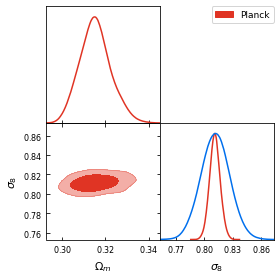

In [8]:
g = gdplt.get_subplot_plotter()
g.triangle_plot([planck18,plens],
                ["Omegam","sigma8"],filled=True,alphas=[1.0,0.7,0.7,0.7,0.7],\
                constrained_layout=True, contour_lws=1.5,\
                legend_labels=["Planck","P-lens"])

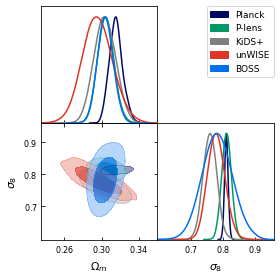

In [12]:
# A version for the BOSS paper.
g = gdplt.get_subplot_plotter()
g.triangle_plot([planck18,plens,kids,unwise,boss],
                ["Omegam","sigma8"],filled=True,alphas=[1.0,0.7,0.7,0.7,0.7],\
                constrained_layout=True, contour_lws=1.5,\
                legend_labels=["Planck","P-lens","KiDS+","unWISE","BOSS"])
#g.export("cmp_external.pdf")
#

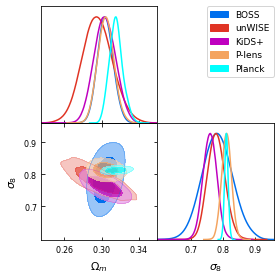

In [13]:
g = gdplt.get_subplot_plotter()
g.triangle_plot([boss,unwise,kids,plens,planck18],
                ["Omegam","sigma8"],filled=True,alphas=[1.0,0.7,0.7,0.7,0.7],\
                colors=[ '#006FED','#E03424','m','sandybrown','cyan'],\
                line_args=[{'color':'#006FED'},\
                           {'color':'#E03424'},\
                           {'color':'m'},\
                           {'color':'sandybrown'},\
                           {'color':'cyan'}],\
                constrained_layout=True, contour_lws=1.5,\
                legend_labels=["BOSS","unWISE","KiDS+","P-lens","Planck"])

g.export("Figures/cmp_external.pdf")#

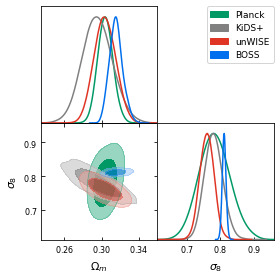

In [16]:
g = gdplt.get_subplot_plotter()
g.triangle_plot([boss, unwise, kids, planck18],
                ["Omegam","sigma8"],filled=True,alphas=[1.0,0.7,0.5,0.5],\
                constrained_layout=True, contour_lws=1.5,\
                legend_labels=["Planck","KiDS+","unWISE","BOSS"])

In [19]:
from getdist import plots

In [25]:
a = plots.GetDistPlotSettings()

In [52]:
colors = ['#006FED',
 '#E03424',
 'gray',
 '#000866',
 '#336600',
 '#006633',
 'm',
 'r']

In [26]:
a.solid_colors

['#006FED',
 '#E03424',
 'gray',
 '#009966',
 '#000866',
 '#336600',
 '#006633',
 'm',
 'r']

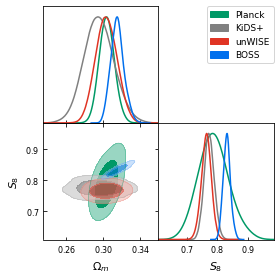

In [28]:
g = gdplt.get_subplot_plotter()
g.triangle_plot([boss, unwise, kids, planck18],
                ["Omegam","S8"],filled=True,alphas=[1.0,0.7,0.5,0.5],\
                constrained_layout=True, contour_lws=1.5,\
                legend_labels=["Planck","KiDS+","unWISE","BOSS"])

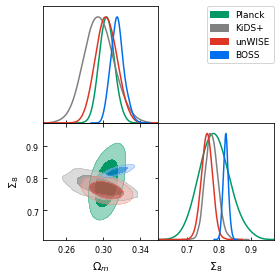

In [30]:
g = gdplt.get_subplot_plotter()
g.triangle_plot([boss, unwise, kids, planck18],
                ["Omegam","Sig8"],filled=True,alphas=[1.0,0.7,0.5,0.5],\
                constrained_layout=True, contour_lws=1.5,\
                legend_labels=["Planck","KiDS+","unWISE","BOSS"])